In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
car_data = pd.read_csv("E:\\data_downloaded\\Used Car Dataset.csv")
car_data.head()
car_data.isnull().sum()



Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [2]:
discribtionofdata = car_data.describe()
discribtionofdata

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [85]:
car_data['engine(cc)'].fillna(float(car_data['engine(cc)'].mean()),inplace=True)
car_data['engine(cc)'].isna().sum()
car_data['mileage(kmpl)'].fillna(float(car_data['mileage(kmpl)'].mean()),inplace=True)
car_data['max_power(bhp)'].fillna(float(car_data['max_power(bhp)'].mean()),inplace=True)
car_data['torque(Nm)'].fillna(float(car_data['torque(Nm)'].mean()),inplace=True)



In [86]:
car_data.drop(columns="Unnamed: 0",inplace=True)


In [5]:
car_data.dtypes


car_name               object
registration_year      object
insurance_validity     object
fuel_type              object
seats                   int64
kms_driven              int64
ownsership             object
transmission           object
manufacturing_year     object
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1553 non-null   float64
 10  engine(cc)          1553 non-null   float64
 11  max_power(bhp)      1553 non-null   float64
 12  torque(Nm)          1553 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 170.0+ KB


In [7]:
data = car_data.loc[:,["engine(cc)","max_power(bhp)","mileage(kmpl)","price(in lakhs)"]]
data.head()

,engine(cc),max_power(bhp),mileage(kmpl),price(in lakhs)
0,2996.0,2996.0,7.81,63.75
1,999.0,999.0,17.40,8.99
2,1995.0,1995.0,20.68,23.75
3,1353.0,1353.0,16.50,13.56
4,1798.0,1798.0,14.67,24.00


In [8]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=59)
from sklearn.linear_model import LinearRegression
obj1 = LinearRegression()
obj1.fit(x_train,y_train)
predicted_y = obj1.predict(x_test)
predicted_y
pd.DataFrame(predicted_y)
r = obj1.score(x_test,y_test)
r

-0.003831193827142032

In [9]:
non_numric_data = car_data.select_dtypes(exclude=["float","int"])
discribtion_non_numric_data = non_numric_data.describe().T
discribtion_non_numric_data = discribtion_non_numric_data.reset_index()
discribtion_non_numric_data.rename(columns={"index":"columns","count":"count","unique":"unique_values","top":"most_common","freq":"frequancy_of_most_common"},inplace=True)
discribtion_non_numric_data
  

,columns,count,unique_values,most_common,frequancy_of_most_common
0,car_name,1553,925,2017 BMW X1 sDrive20d Expedition,25
1,registration_year,1553,178,2017,40
2,insurance_validity,1553,6,Comprehensive,1084
3,fuel_type,1553,4,Petrol,1013
4,ownsership,1553,22,First Owner,1240
5,transmission,1553,13,Manual,835
6,manufacturing_year,1553,19,2018,236


In [10]:
nummeric_data = car_data.select_dtypes(include=['float',"int"])
numeric_data_disc = nummeric_data = nummeric_data.describe().T
numeric_data_disc = numeric_data_disc.reset_index()
numeric_data_disc.rename(columns={"index":"columns","count":"count","mean":"mean","std":"std","25%":"Q1","50%":"Q2","75%":"Q3","max":"max"})



,columns,count,mean,std,min,Q1,Q2,Q3,max
0,seats,1553.0,9.148036e+01,2.403424e+03,4.00,5.00,5.00,5.0,6.700000e+04
1,kms_driven,1553.0,5.284193e+04,4.006780e+04,620.00,30000.00,49134.00,70000.0,8.100000e+05
2,mileage(kmpl),1553.0,2.369273e+02,5.853977e+02,7.81,16.35,18.90,22.0,3.996000e+03
3,engine(cc),1553.0,1.471857e+10,2.183516e+11,5.00,1197.00,1462.00,1995.0,3.258640e+12
4,max_power(bhp),1553.0,1.471857e+10,2.183516e+11,5.00,1197.00,1462.00,1995.0,3.258640e+12
5,torque(Nm),1553.0,1.423989e+04,9.653776e+04,5.00,400.00,1173.00,8850.0,1.464800e+06
6,price(in lakhs),1553.0,1.661415e+02,3.478855e+03,1.00,4.66,7.14,17.0,9.500000e+04


array([1.41939499e+08])

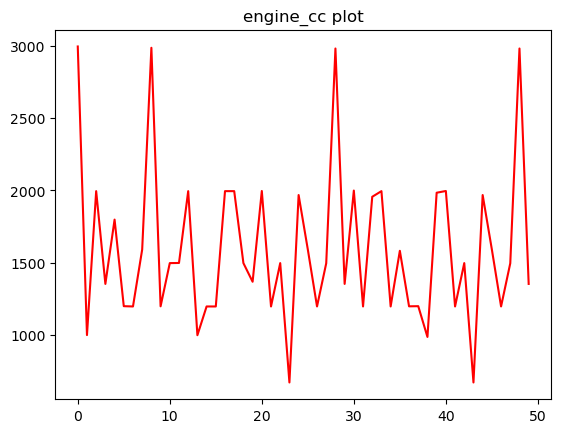

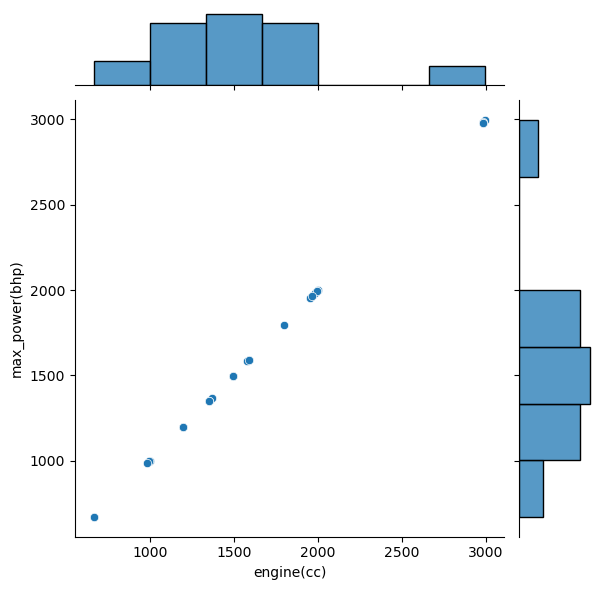

In [11]:
car_data.columns.to_list()
varr = car_data.iloc[:50,-4]
varr.plot(title="engine_cc plot",c="r")
var1 = car_data.iloc[:50,-3]

sns.jointplot(x=varr,y=var1)
np.correlate(varr,var1)


In [12]:
d = car_data.iloc[:,12:]
d.head()
np.abs(d.corr())


,torque(Nm),price(in lakhs)
torque(Nm),1.000000,0.006467
price(in lakhs),0.006467,1.000000


plottin data

<Axes: xlabel='kms_driven', ylabel='car_name'>

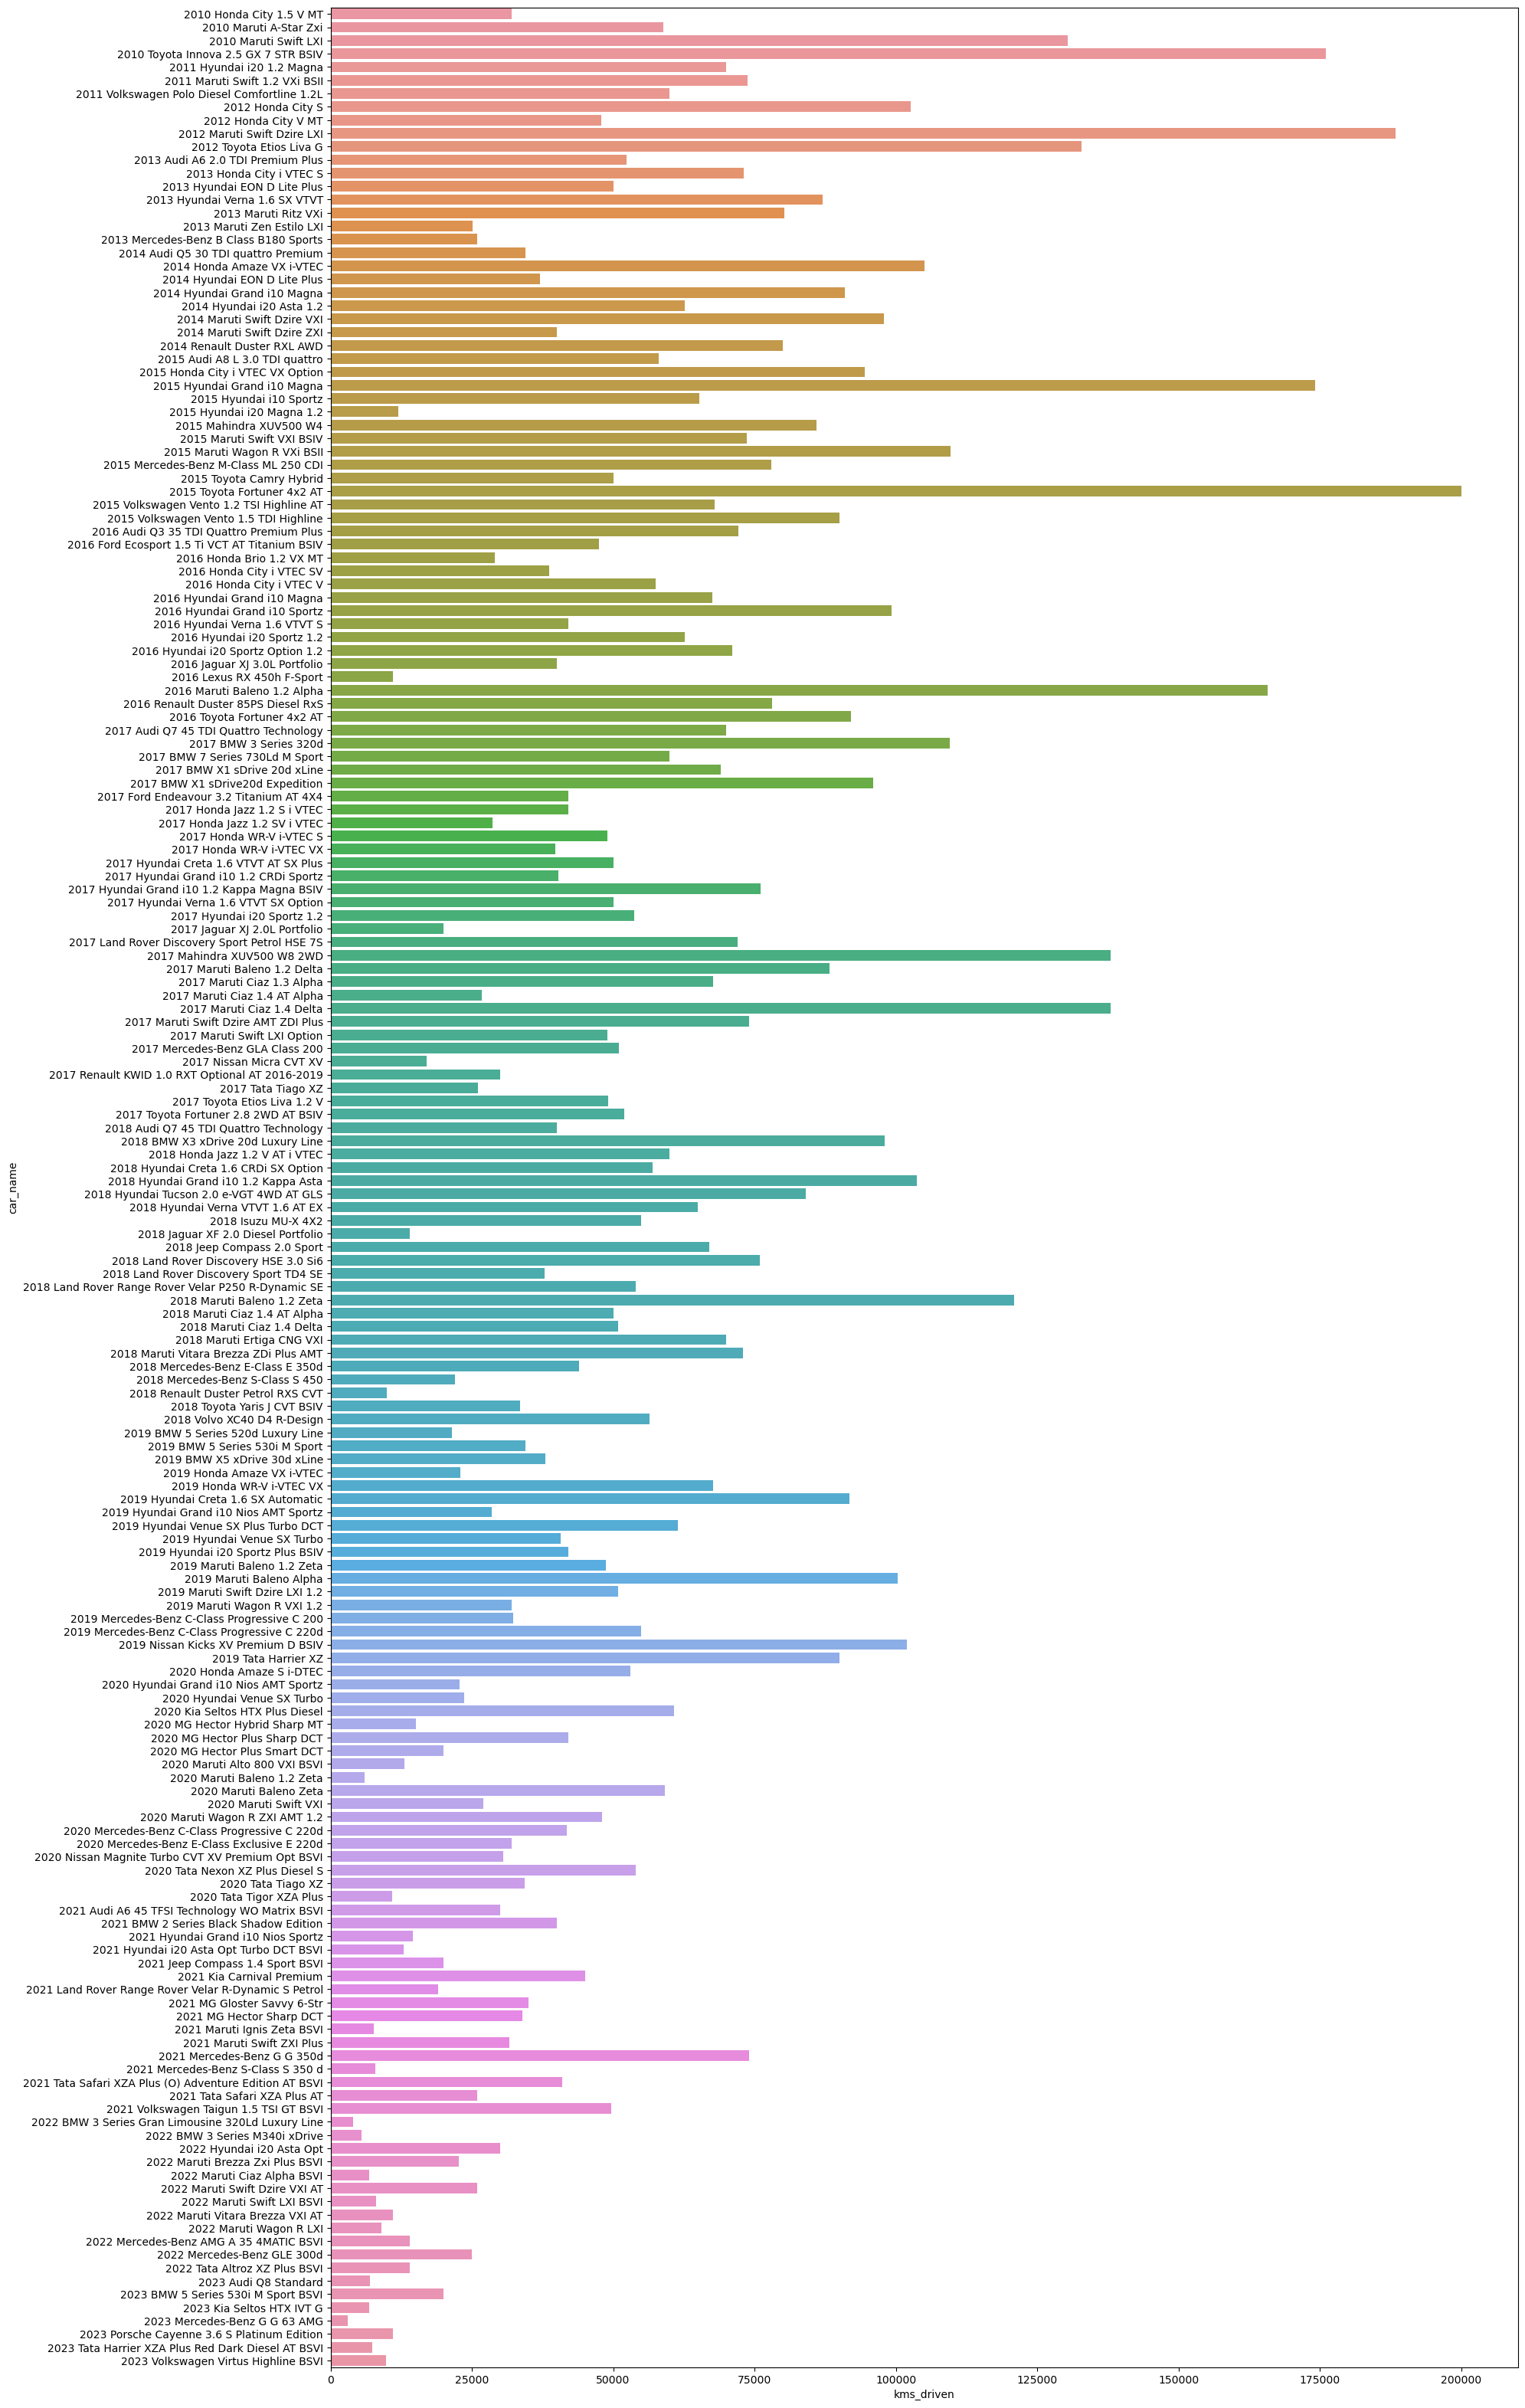

In [46]:
sample_data = car_data.sample(n=200)
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,40))
gts = sample_data.groupby("car_name",as_index=False)['kms_driven'].sum()
sns.barplot(y="car_name",x="kms_driven",data=gts)


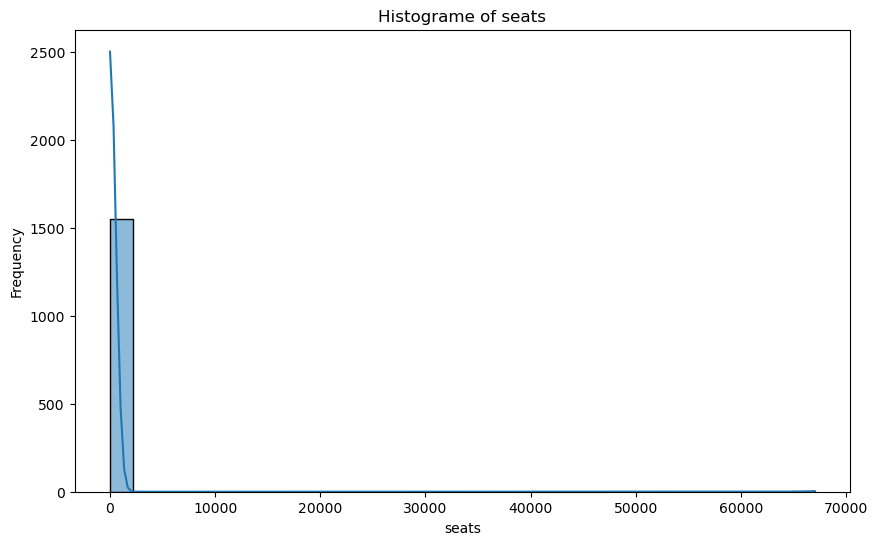

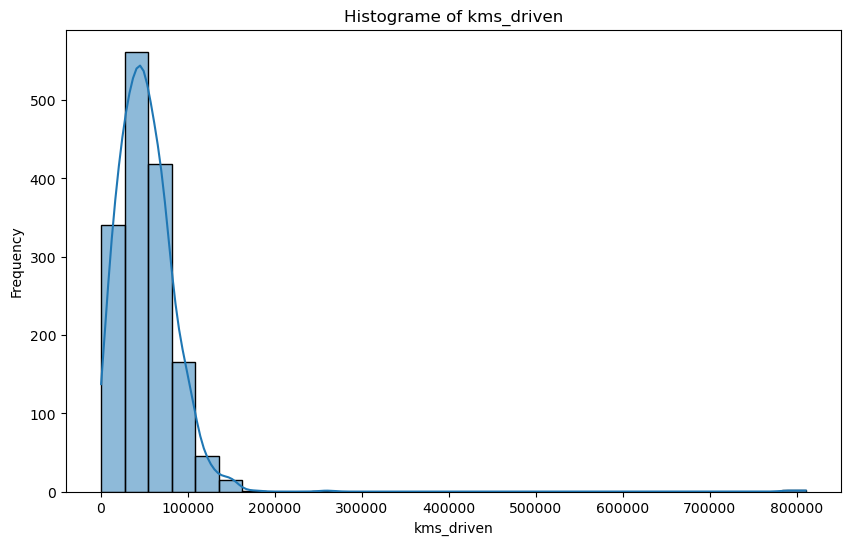

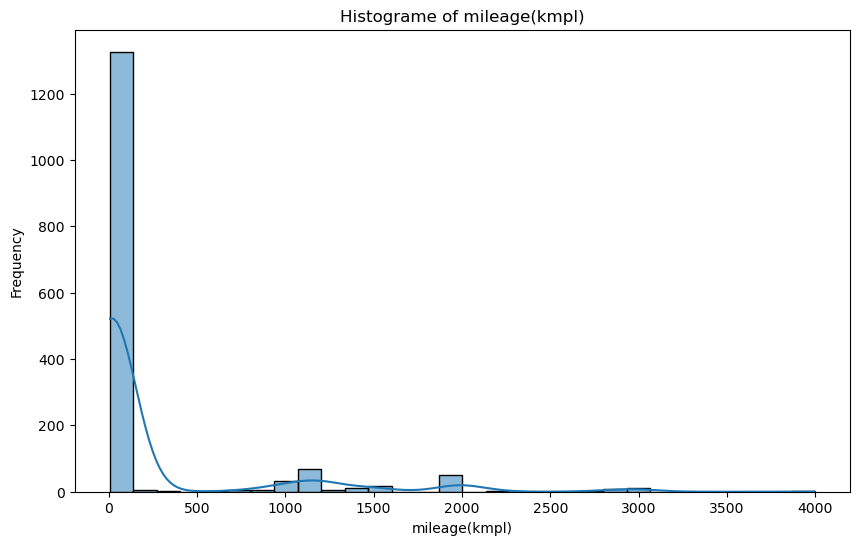

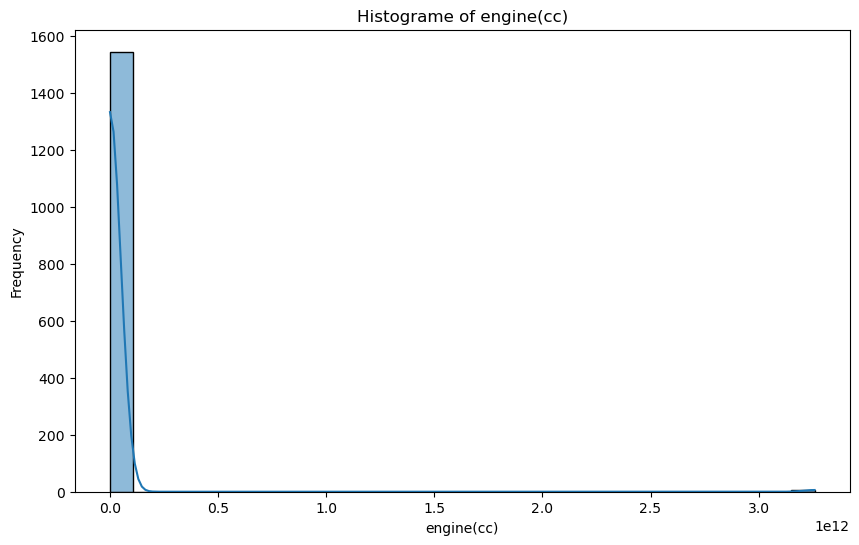

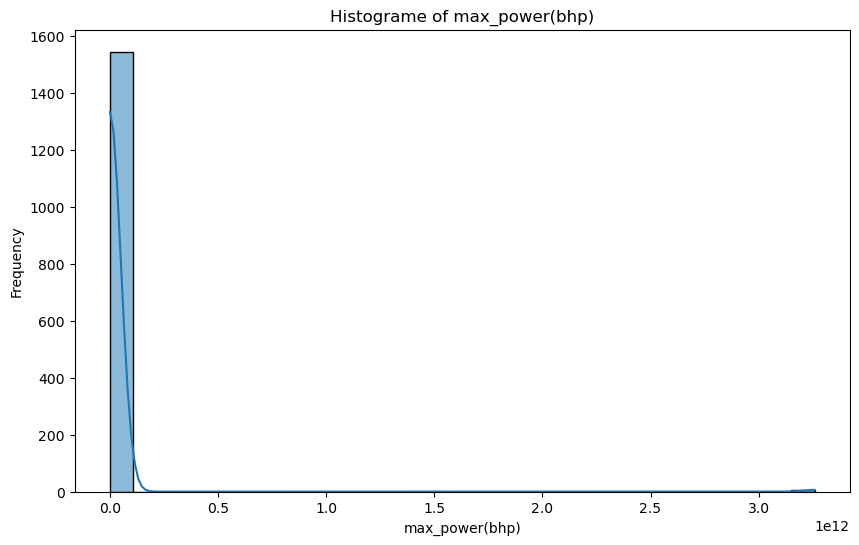

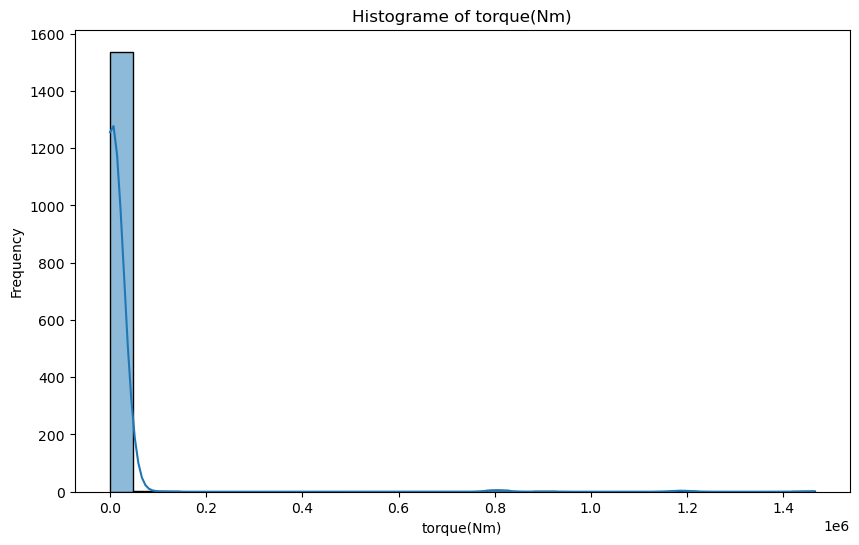

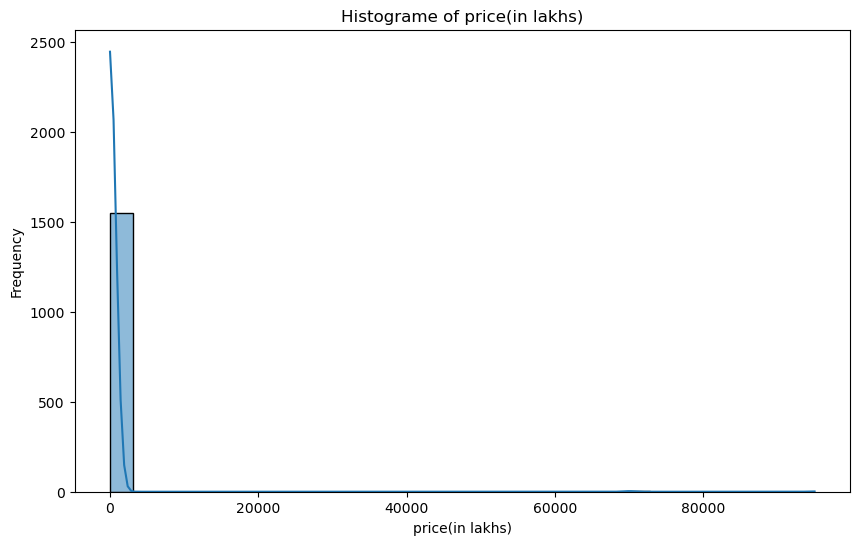

In [14]:
num_data = car_data.select_dtypes(include=['float',"int"])

for column in num_data.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(car_data[column],kde=True,bins=30)
    plt.title(f'Histograme of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Text(0.5, 1.0, 'boxplot of kms_driven')

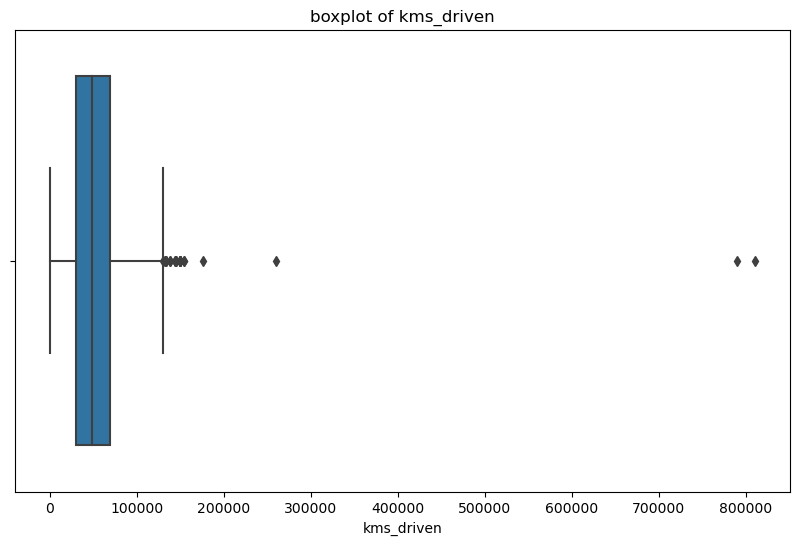

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=car_data['kms_driven'])
plt.title("boxplot of kms_driven")

<Axes: title={'center': 'mean price of each year'}, xlabel='manufacturing_year', ylabel='mean _price'>

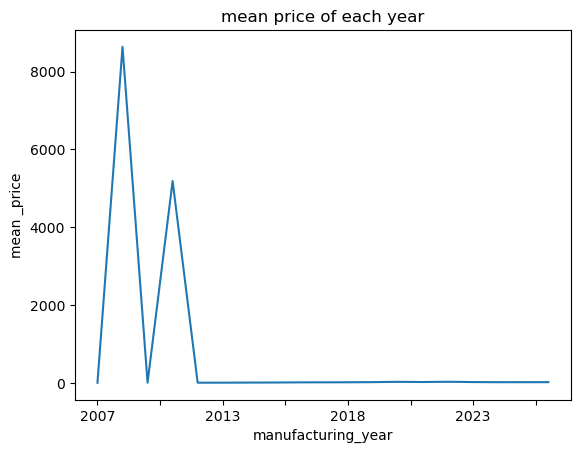

In [16]:
mean_price = car_data.groupby('manufacturing_year')["price(in lakhs)"].mean()
plt.title("mean price of each year")
plt.ylabel("mean _price")
mean_price.plot()



box_plot for fuel type

<Axes: xlabel='fuel_type', ylabel='price(in lakhs)'>

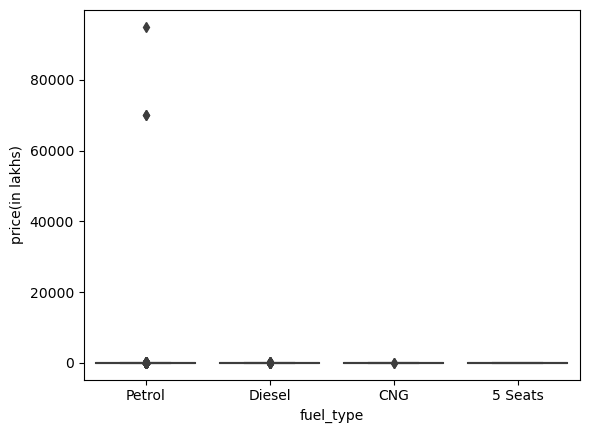

In [17]:
#plt.figure(figsize=(10,10))
sns.boxplot(x=car_data['fuel_type'],y=car_data['price(in lakhs)'])

Text(0.5, 1.0, 'kilometres driven vs price')

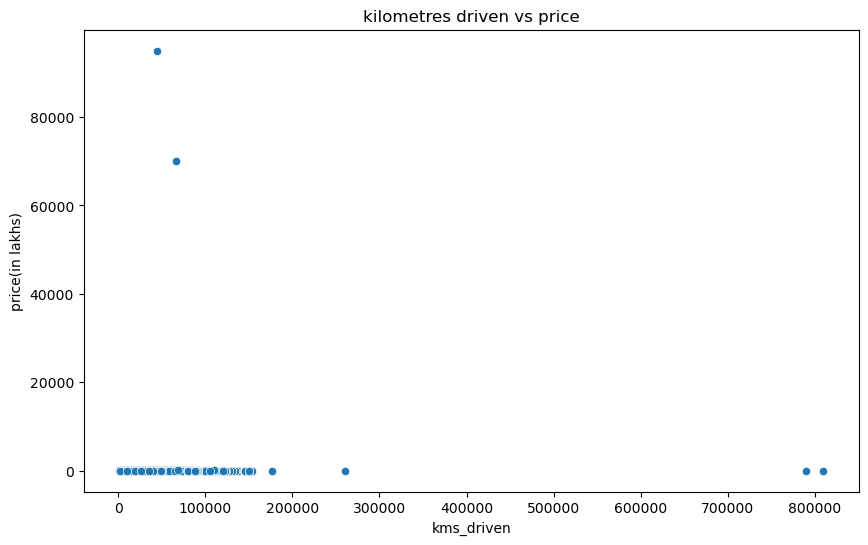

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=car_data['kms_driven'],y=car_data['price(in lakhs)'])
plt.title("kilometres driven vs price")


<Axes: xlabel='price(in lakhs)', ylabel='kms_driven'>

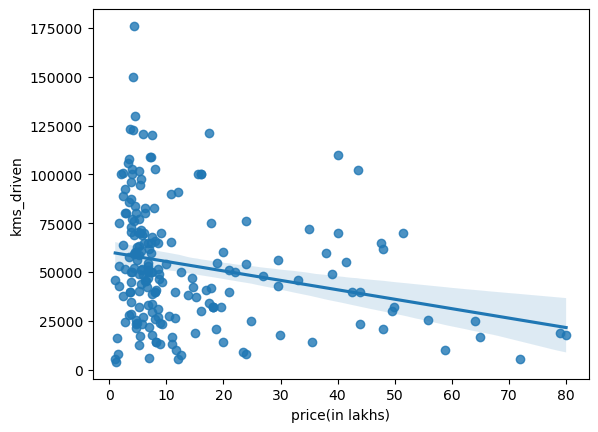

In [19]:
sampleprice = car_data['price(in lakhs)'].sample(200,random_state=123)

samplekm = car_data['kms_driven'].sample(200,random_state=123)
sns.regplot(x=sampleprice,y=samplekm)

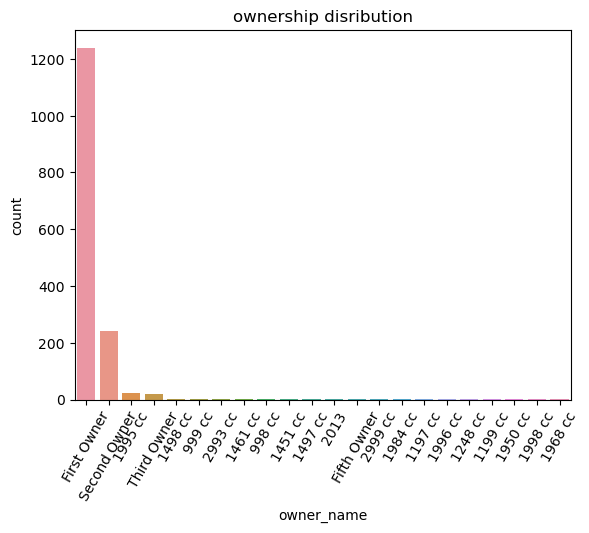

In [20]:
counts_of_owner = car_data["ownsership"].value_counts()
sns.barplot(x=counts_of_owner.index,y=counts_of_owner.values)
plt.title("ownership disribution")
plt.xlabel("owner_name")
plt.ylabel("count")
plt.xticks(rotation=60)
plt.show()


In [21]:
car_data.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


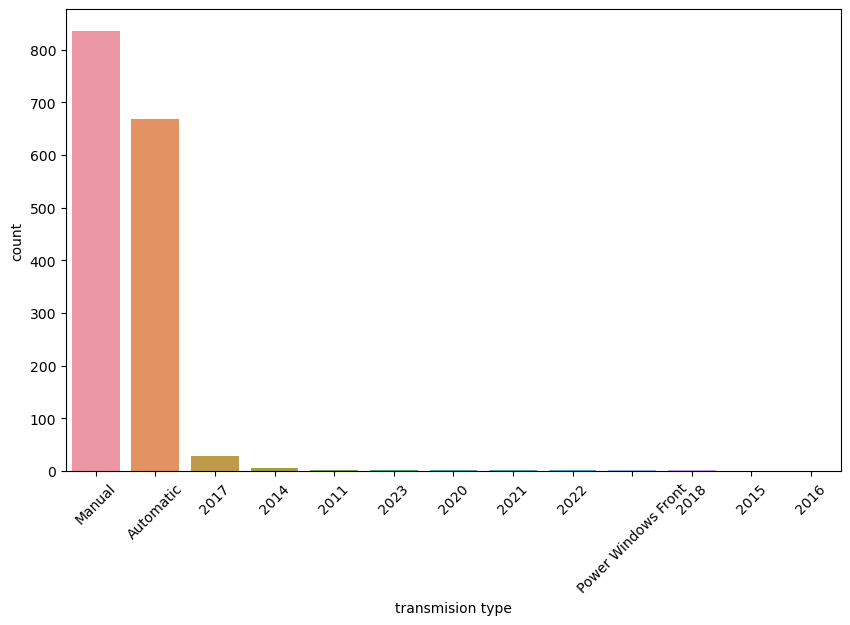

In [22]:
transmision = car_data['transmission'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=transmision.index,y=transmision.values)
plt.xlabel("transmision type")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()


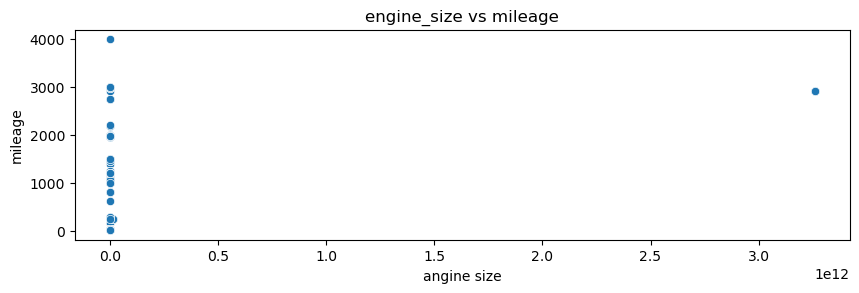

<Axes: xlabel='engine(cc)', ylabel='mileage(kmpl)'>

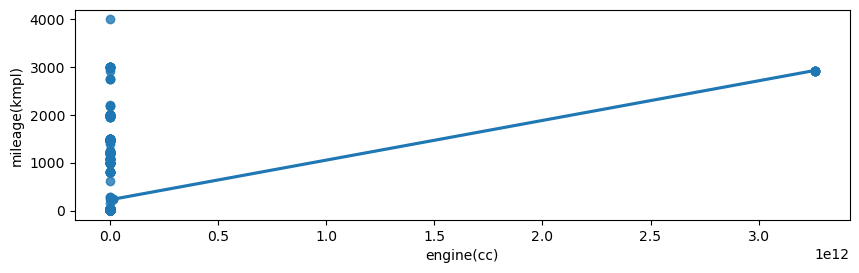

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.scatterplot(x=car_data['engine(cc)'],y=car_data['mileage(kmpl)'])
plt.title("engine_size vs mileage")
plt.xlabel("angine size")
plt.ylabel("mileage")
plt.show()
plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
sns.regplot(x=car_data['engine(cc)'],y=car_data['mileage(kmpl)'])

In [32]:
sample_data.to_csv(R"D:\python_tests\car_data.csv",sep=",",encoding="utf8")

In [87]:
list1 = car_data['transmission'].unique().tolist()
list2 = list1[2:]
new_values = ["Manual","Manual","Automatic","Automatic","Automatic","Automatic","Automatic","Four_wheel_drive","Manual","Manual","Manual"]
rt = car_data['transmission'].replace(list2,new_values)
car_data['transmission'] = rt

In [90]:

sample_data1 = car_data.sample(500)


In [94]:
sample_data1 = sample_data1.reset_index(drop=True)


In [96]:
sample_data1.to_csv("D:\python_tests\car_data1.csv")

<Axes: >

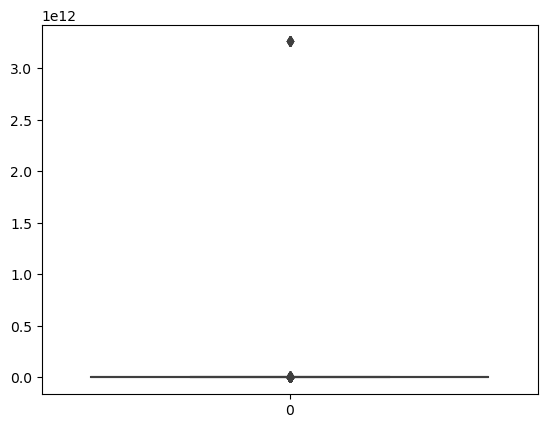

In [98]:
from scipy import stats
sns.boxplot(car_data['engine(cc)'])


In [101]:
z = np.abs(stats.zscore(car_data['engine(cc)']))


0       0.067429
1       0.067429
2       0.067429
3       0.067429
4       0.067429
          ...   
1548    0.067429
1549    0.067429
1550    0.067429
1551    0.067429
1552    0.067429
Name: engine(cc), Length: 1553, dtype: float64

In [106]:
car_data.loc[z>3,"engine(cc)"] = car_data['engine(cc)'].mean()


467     9.690671e+07
487     9.690671e+07
705     9.690671e+07
724     9.690671e+07
916     9.690671e+07
935     9.690671e+07
1463    9.690671e+07
Name: engine(cc), dtype: float64